# Install

In [ ]:
##If you're curious about the GPU you've been assigned
!nvidia-smi

In [ ]:
####Only run this the first time!###
#Subsequently, run the next block with pull command
!git clone https://github.com/charlesabouhaidar/COMP473-Project.git
import os
os.chdir('COMP473-Project')
os.chdir('CycleGAN_simple')
!pip install -r requirements.txt

In [1]:
from util.util import loss_to_graph

In [ ]:
##This for sure doesn't work, you need to start the repo from the branch you're working on in the first place
#!git checkout <branch_name>

In [ ]:
## Update colab to reflect changes made to repo, Honestly not sure this works though.
!git pull

# Datasets
Download one of the official datasets below (ordered by size, smallest to largest):
<ul>
    <li>grumpifycat</li>
    <li>facades</li>
    <li>apple2orange</li>
    <li>horse2zebra</li>
    <li>summer2winter_yosemite</li>
    <li>cezanne2photo</li>
    <li>ukiyoe2photo</li>
    <li>monet2photo</li>
    <li>vangogh2photo</li>
    <li>iphone2dslr_flower</li>
    <li>maps</li>
   </ul>

In [ ]:
!bash ./datasets/download_cyclegan_datasets.sh vangogh2photo

# Training

Note that all training done on colab will not be saved. After running the training script below make sure to save the files locally on your computer using the appropriate cell-blocks in "Save Checkpoints Locally", to keep the results.
<ul>
    <li>--dataroot: the directory for the data you downloaded above</li>
    <li>--name: the name you'd like to give your experiment</li>
    <li>--n_epochs: The number of epochs to train without weight decay</li>
    <li>--n_epochs_decay: The number of epochs to train with weight decay, these occur after n_epochs</li>
    <li>--continue_train: Set this boolean to load a model and continue training it.</li>
    <li>There are more options for you to explore in options/base_options.py and option/train_options.py</li>
   </ul>
For experiment names I think it'd be helpful if we adopted the format dataset_name for example vangogh2photo_smalldiscriminator.

In [ ]:
!python train.py --dataroot ./datasets/summer2winter_yosemite --name <experiment_name> --n_epochs=40 --n_epochs_decay=40

### Save Checkpoints Locally
Google Colab is definitely a bit annoying for this part. We have to manually save the checkpoints and then push them to the repo for the next time, or upload them directly to colab for continued training later.

In [ ]:
##saving images from checkpoints takes too long and risks a time-out. Getting just the latest models seems best
from google.colab import files
files.download("model_checkpoints/vangogh2photo_cycleweight1/latest_net_D_A.pth")
files.download("model_checkpoints/vangogh2photo_cycleweight1/latest_net_D_B.pth")
files.download("model_checkpoints/vangogh2photo_cycleweight1/latest_net_G_A.pth")
files.download("model_checkpoints/vangogh2photo_cycleweight1/latest_net_G_B.pth")
files.download("model_checkpoints/vangogh2photo_cycleweight1/loss_log.txt")
files.download("model_checkpoints/vangogh2photo_cycleweight1/train_opt.txt")

In [ ]:
##this saves all the other model checkpoints but no images
from google.colab import files
!rm -r model_checkpoints/vangogh2photo_cycleweight1/web
!zip -r model_checkpoints/vangogh2photo_cycleweight1.zip model_checkpoints/vangogh2photo_cycleweight1
files.download("model_checkpoints/vangogh2photo_cycleweight1.zip")

# Testing / Inference
Same deal as training. To save the test results run the "Save Results Locally" right after.

In [ ]:
!python test.py --dataroot datasets/summer2winter_yosemite --name <experiment_name> --no_dropout --model cycle_gan

### Save Results Locally
Just change the <experiment_name\> to match the same name you used while training

In [ ]:
!zip -r results/<experiment_name>.zip results/<experiment_name>/test_latest
files.download("results/<experiment_name>_results.zip")

# Experiments

<hr style="height:5px">
<hr style="height:5px">
### Linear Weight Increase on Cycle Loss (Short name: cycleweight)
Defining feature of experiment:
<p>Added a linear increase in the weight of the cycle consistency loss of main objective function. Where $k$ is the epoch number lambda was set accordingly. Extra hyperparameters for this experiment are $\lambda_1$ and $c$.$$\lambda_1 = 1.0, \, \lambda_k = \min(1.0 + c*k, 20)$$</p>

<hr style="height:2px">
<h5> horse2zebra_cycleweight Training Parameters</h5>
<ul>
<li>Dataset: horse2zebra (1334 images)</li>
    <li>Number of Epochs: 200, 100 without weight decay followed by 100 with linear weight decay to 0</li>
<li>Learning Rate: 0.0002</li>
<li>batch size: 1</li>
<li>image size: 128 x 128</li>
<li>discriminators: 3 layer PatchGAN with 70 x 70 window</li>
<li>generators: 6 block Residual Network </li>
<li>pool size: 50</li>
     <li>$\lambda_1$: 1</li>
    <li>$c$: 0.1</li>
</ul>

<h5> horse2zebra_cycleweight Training Losses</h5>

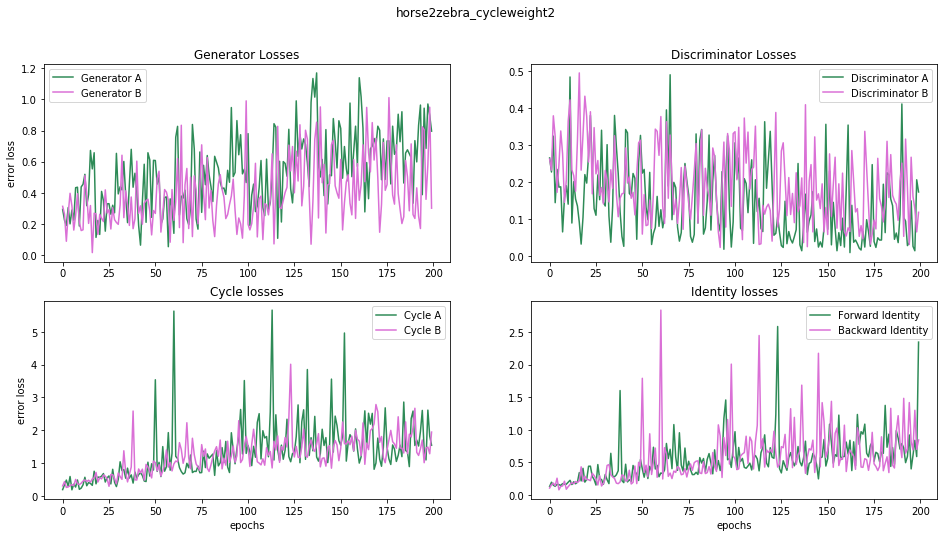

In [2]:
loss_to_graph("horse2zebra_cycleweight2", "report_resources/logs/horse2zebra_cycleweight_loss_log.txt")

<i>Note that cycle losses are being steadily multiplied by a heavier and heavier weight. This affects both the cycle loss and identity loss.</i>

<h5>Inference Images</h5>
Results from the paper are on the left with our results on the same images on the right. You can see that ours kept from changing the background colours as much and overall wasn't as zealous with adding strips to the images.<br>
<table>
    <tr><th style="text-align:center">Original Photo</th><th style="text-align:center">Results from Zhu et. al</th><th style="text-align:center">Experiment Results</th></tr>
    <tr><td><img src="report_resources/images/horse2zebra_cycleweight2_1org.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_1zhu.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_1ours.png" style="width:200px;height:200px"/></td></tr>
    
   <tr><td><img src="report_resources/images/horse2zebra_cycleweight2_2org.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_2zhu.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_2ours.png" style="width:200px;height:200px"/></td></tr>
   
    <tr><td><img src="report_resources/images/horse2zebra_cycleweight2_3org.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_3zhu.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_3ours.png" style="width:200px;height:200px"/></td></tr>
    
    <tr><td><img src="report_resources/images/horse2zebra_cycleweight2_4org.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_4zhu.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_4ours.png" style="width:200px;height:200px"/></td></tr>
   </table>

<hr style="height:5px">
<hr style="height:5px">
### Training Generators with Ensemble of Discriminators (Short Name: ensemble)
Defining Feature of Experiment:
<p>In this experiment we swapped out the discriminators for other pre-trained discriminators and concluded training with those. The idea being that generators were less likely to find "tricks" to fool the discriminators. Two added hyperparameters for this experiment. First is Number of Discriminators which is the number of discriminators used to train each generator. Second is Tuning Epochs which is the number of epochs extra epochs the generators trained with each extra discriminator.
<hr style="height:2px">
<h5> horse2zebra_ensemble Training Parameters</h5>
<ul>
    <li>Dataset: horse2zebra (1334 images)</li>
    <li>Number of Epochs: 220, 100 without weight decay followed by 100 with linear weight decay to 0. The rest are part of tuning epochs</li>
    <li>Learning Rate: 0.0002</li>
    <li>batch size: 1</li>
    <li>image size: 128 x 128</li>
    <li>discriminators: 3 layer PatchGAN with 70 x 70 window</li>
    <li>generators: 6 block Residual Network </li>
    <li>pool size: 50</li>
    <li>Number of Discriminators: 2</li>
    <li>Tuning Epochs: 20</li>
</ul>

<h5>horse2zebra_ensemble Training Losses</h5>

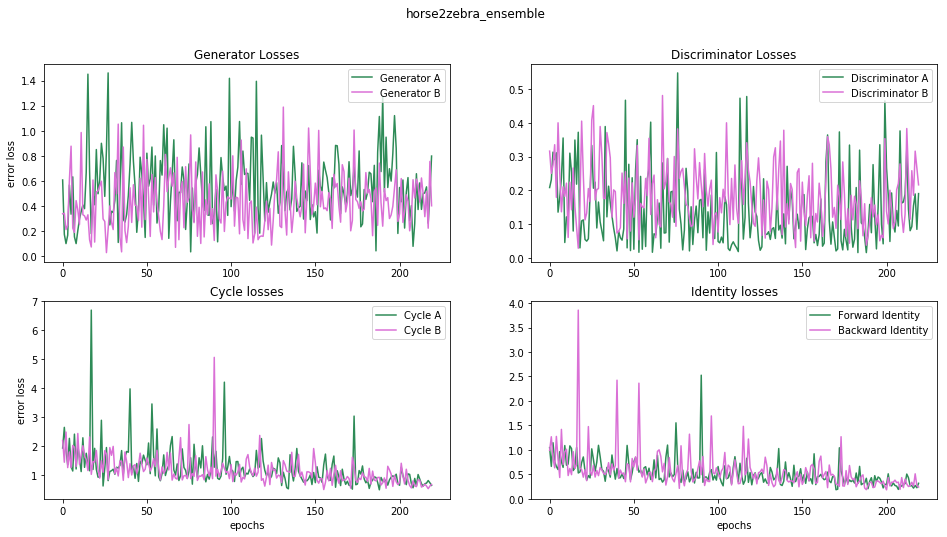

In [4]:
loss_to_graph("horse2zebra_ensemble", "report_resources/logs/horse2zebra_ensemble_loss_log.txt")

<h5>Inference Images</h5>
<table>
    <tr><th style="text-align:center">Original Photo</th><th style="text-align:center">Results from Zhu et. al</th><th style="text-align:center">Experiment Results</th></tr>
    <tr><td><img src="report_resources/images/horse2zebra_cycleweight2_1org.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_1zhu.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_ensemble_1ours.png" style="width:200px;height:200px"/></td></tr>
    
   <tr><td><img src="report_resources/images/horse2zebra_cycleweight2_2org.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_2zhu.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_ensemble_2ours.png" style="width:200px;height:200px"/></td></tr>
   
    <tr><td><img src="report_resources/images/horse2zebra_cycleweight2_3org.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_3zhu.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_ensemble_3ours.png" style="width:200px;height:200px"/></td></tr>
    
    <tr><td><img src="report_resources/images/horse2zebra_cycleweight2_4org.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_cycleweight2_4zhu.png" style="width:200px;height:200px"/></td><td><img src="report_resources/images/horse2zebra_ensemble_4ours.png" style="width:200px;height:200px"/></td></tr>
   </table>